In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats


pd.set_option('display.max_rows', None)
pd.pandas.set_option('display.max_columns', None)
train_db = pd.read_csv('train.csv')
# test_db = pd.read_csv('test.csv')


# 1. Cleaning

Clean the dataset, remove the outliers, before any data analysis. Explain what you did.

Survival - 0 = No, 1 = Yes
pclass(Ticket class) - 1 = 1st, 2 = 2nd, 3 = 3rd
Sibsp - # of siblings / spouses aboard the Titanic
Parch - # of parents / children aboard the Titanic
Embarked - port of embarkation - C = Cherbourg, Q = Queenstown, S = Southampton

In [2]:
#print(train_db.head(5))
#print(train_db.count())
print(train_db.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [3]:
# print(f"Number of Null Values:\n\n{test_db.isna().sum()}")
print(f"Number of Null Values:\n\n{train_db.isna().sum()}")

print(f"\nDuplicated Values for train = {train_db.duplicated().sum()}")
# print(f"\nDuplicated Values for test = {test_db.duplicated().sum()}")

Number of Null Values:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Duplicated Values for train = 0


Text(0.5, 1.0, 'Age distribution')

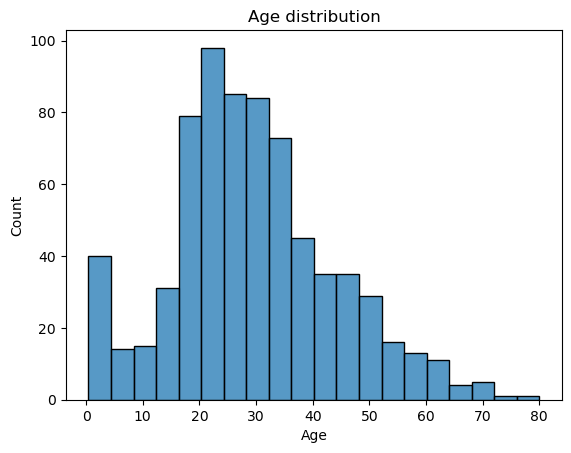

In [4]:
ageDist = sns.histplot(data=train_db, x = 'Age')
ageDist.set_title("Age distribution")

# 1a) In both databases, fill in ages that are NaN with the average of ages

In [5]:
# test_db['Age'] = test_db['Age'].fillna(test_db['Age'].mean())
train_db['Age'] = train_db['Age'].fillna(train_db['Age'].mean())

#print(f"Number of Null Values:\n\n{test_db.isna().sum()}")
#print(f"Number of Null Values:\n\n{train_db.isna().sum()}")


# 1b) Drop data in test_db where Fare is NaN and drop data in train_db where Embarked is NaN


In [6]:
#print(test_db[test_db['Fare'].isnull()])
# test_db = test_db[test_db['Fare'].notna()]
#print(train_db[train_db['Embarked'].isnull()])
train_db = train_db[train_db['Embarked'].notna()]
#print(train_db[train_db['Embarked'].isnull()])

 # 1c)Change male to 0 female to 1
 
 Embarked - port of embarkation - C = Cherbourg, Q = Queenstown, S = Southampton
 
 Could probably change Embark to a number for prediction

In [7]:
train_db.loc[train_db['Sex'] == 'male', 'Sex'] = 0.0
train_db.loc[train_db['Sex'] == 'female', 'Sex'] = 1.0

# test_db.loc[test_db['Sex'] == 'male', 'Sex'] = 0.0
# test_db.loc[test_db['Sex'] == 'female', 'Sex'] = 1.0

 # 1d) Drop columns that wont be necessary in our analysis (Cabin, Name, Ticket)
 
 People with NaN for cabins might be staff members?

In [8]:
# test_db.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
train_db.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [9]:
print(train_db.head(5))

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3  0.0  22.0      1      0   7.2500        S
1            2         1       1  1.0  38.0      1      0  71.2833        C
2            3         1       3  1.0  26.0      0      0   7.9250        S
3            4         1       1  1.0  35.0      1      0  53.1000        S
4            5         0       3  0.0  35.0      0      0   8.0500        S


# 1e) Change Outliers using z-score

For Fares, if the fare was greater than 3 standard deviations from the the mean, then the fare was set to the mean of the database without outliers.

Text(0.5, 1.0, 'Fare Distribution')

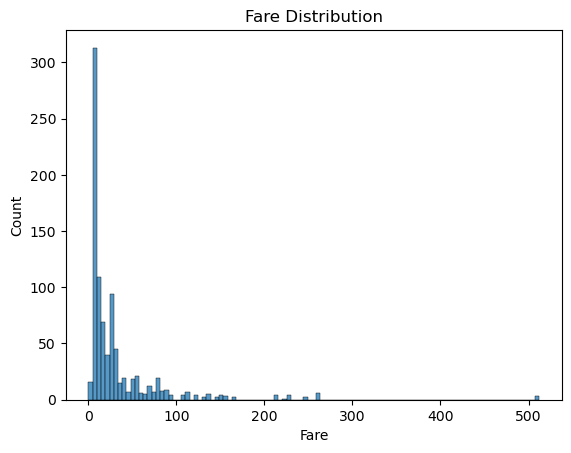

In [10]:
# #print(train_db[train_db['Fare'] > 200])
# print(train_db['Fare'].mean())

# train_db_outliers = train_db[np.abs(stats.zscore(train_db['Fare'])) > 3]
# train_db_removed_outliers = train_db[np.abs(stats.zscore(train_db['Fare'])) < 3]
# train_db_removed_outliers_mean = train_db_removed_outliers['Fare'].mean()
# print(train_db_removed_outliers_mean)

# train_db.loc[np.abs(stats.zscore(train_db['Fare'])) > 3, 'Fare'] = train_db_removed_outliers_mean

# print(train_db['Fare'].mean())

# #print(train_db_outliers)
# #print(train_db.describe())


# print(test_db['Fare'].mean())
# test_db_outliers = test_db[np.abs(stats.zscore(test_db['Fare'])) > 3]
# test_db_removed_outliers = test_db[np.abs(stats.zscore(test_db['Fare'])) < 3]
# test_db_removed_outliers_mean = test_db_removed_outliers['Fare'].mean()
# print(test_db_removed_outliers_mean)

# test_db.loc[np.abs(stats.zscore(test_db['Fare'])) > 3, 'Fare'] = test_db_removed_outliers_mean

# print(test_db['Fare'].mean())
fareDist = sns.histplot(data=train_db, x = 'Fare')
fareDist.set_title("Fare Distribution")

# 2. Explore the socio-economic status of the passenger, is there any relationship between socio-economic status with other features, such as age, gender, number of family members on board, etc.

pearson corr of trained 

Using a one-way ANOVA between the ticket class and fares, the f-statistic of 363.53 shows that there is a big variation of fares between the ticket class relative to the fare cost within each ticket class. Therefore, there is a significant diffrence in average fare cost between each ticket class. The p value of 3.97e-84 shows that the difference is statiscally significant at alpha 0.01.

Given this and the average of the fares for each ticket class , it is fair to categorize people wih the ticket class of 1 are in the upper class, ticket class 2 are in the middle class and ticket class 1 are the working/poor class. 

Using a one-way ANOVA between the ticket class and # of siblings/spouses and # of parents/children, shows that there is no statiscally siginficant difference between the means of siblings/spouses or # of parents/children for each ticket class at alpha 0.01.

Using a one-way ANOVA between the ticket class and age, shows that there is a statiscally siginficant difference between the means of age for each ticket class with p value 2.82e-23 at alpha 0.01. From this we can see that the higher class the passenger was, the more their age tended to be higher.

In [11]:
print(train_db.describe())
#grpah fare vs pclass
pclass1 = train_db[train_db['Pclass'] == 1]
pclass2 = train_db[train_db['Pclass'] == 2]
pclass3 = train_db[train_db['Pclass'] == 3]
#print(train_db[train_db['Sibsp'] > 2])
#print(train_db['SibSp'])

#print(pclass1['Fare'])
                   
print("Fare: " + str(stats.f_oneway(pclass3['Fare'], pclass2['Fare'], pclass1['Fare'])))
print("SibSp: " +  str(stats.f_oneway(pclass3['SibSp'], pclass2['SibSp'], pclass1['SibSp'])))
print("Age: " + str(stats.f_oneway(pclass3['Age'], pclass2['Age'], pclass1['Age'])))
print("Parch: " + str(stats.f_oneway(pclass3['Parch'], pclass2['Parch'], pclass1['Parch'])))



print(train_db.groupby('Pclass')[['Survived', 'Age', 'SibSp', 'Parch', 'Fare']].mean())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   889.000000  889.000000  889.000000  889.000000  889.000000   
mean    446.000000    0.382452    2.311586   29.653446    0.524184   
std     256.998173    0.486260    0.834700   12.968366    1.103705   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     224.000000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.000000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  889.000000  889.000000  
mean     0.382452   32.096681  
std      0.806761   49.697504  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
Fare: F_onewayResult(statistic=240.38829529293847, pvalue=3.9731247008621683e-84)

# 3. Explore the distribution of survival victims in relation to age, gender, socioeconomic class, etc. 

From these graphs, it is fair to say that females had the highest survival rate, espcially if they were in class 3 or 2. Females had a much higher survival rate then men with 97.67% vs 36.88% for class 1 and 92.10% vs 15.74% for class 2. In class 3, females had a survival rate of 50% and males had 13.54%
In all all ticket classes, men had the highest chance of surival if they were in class 1.


PClass 1 Women Survival: 96.73913043478261%
PClass 1 Men Survival :36.885245901639344%
PClass 2 Women Survival: 92.10526315789474%
PClass 2 Men Survival :15.74074074074074%
PClass 3 Women Survival: 50.0%
PClass 3 Men Survival :13.544668587896252%


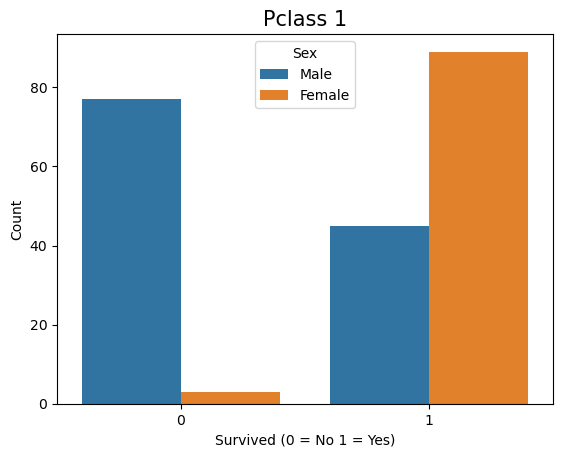

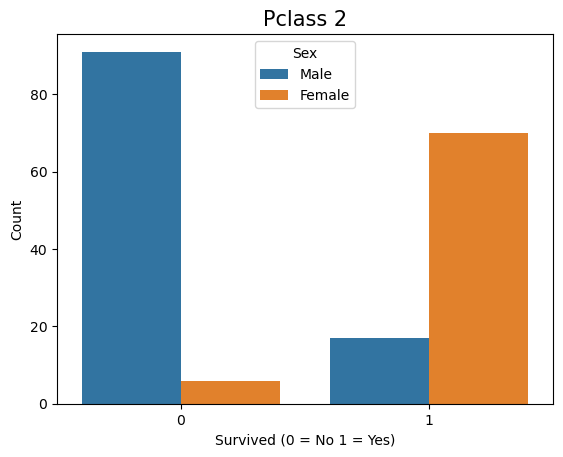

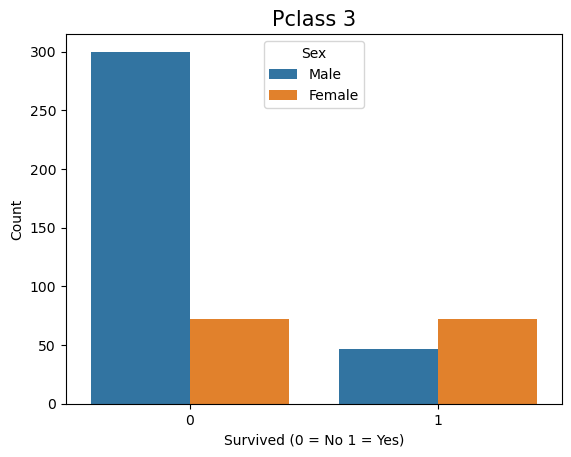

'\npearson = train_db[[\'Sex\', \'Survived\', \'Pclass\', \'Age\', \'SibSp\', \'Parch\', \'Fare\']].copy()\nsns.heatmap(pearson.corr("pearson"), annot=True)\nplt.title("Pearson Correlation of Numerical Variables")\nplt.show()\n'

In [12]:
print("PClass 1 Women Survival: " + str(len(pclass1[(pclass1['Sex'] == 1) & (pclass1['Survived'] == 1)]) / len(pclass1[pclass1['Sex'] == 1]) * 100 ) + "%" )
print("PClass 1 Men Survival :" + str(len(pclass1[(pclass1['Sex'] == 0) & (pclass1['Survived'] == 1)]) / len(pclass1[pclass1['Sex'] == 0]) * 100 ) + "%" )

print("PClass 2 Women Survival: " + str(len(pclass2[(pclass2['Sex'] == 1) & (pclass2['Survived'] == 1)]) / len(pclass2[pclass2['Sex'] == 1]) * 100 ) + "%" )
print("PClass 2 Men Survival :" + str(len(pclass2[(pclass2['Sex'] == 0) & (pclass2['Survived'] == 1)]) / len(pclass2[pclass2['Sex'] == 0]) * 100 ) + "%" )

print("PClass 3 Women Survival: " + str(len(pclass3[(pclass3['Sex'] == 1) & (pclass3['Survived'] == 1)]) / len(pclass3[pclass3['Sex'] == 1]) * 100 ) + "%" )
print("PClass 3 Men Survival :" + str(len(pclass3[(pclass3['Sex'] == 0) & (pclass3['Survived'] == 1)]) / len(pclass3[pclass3['Sex'] == 0]) * 100 ) + "%" )

#class2 = pclass_sex_surv[pclass_sex_surv['Pclass'] == 2]
#pclass3 = pclass_sex_surv[pclass_sex_surv['Pclass'] == 3]    

fig, ax = plt.subplots()
plt.title("Pclass 1", fontsize = 15)
ax = sns.countplot(x=pclass1['Survived'],hue= pclass1['Sex'])
ax.set_xlabel("Survived (0 = No 1 = Yes)")
ax.set_ylabel("Count")
plt.legend(title='Sex', loc='upper center', labels=['Male', 'Female'])
plt.show()

plt.title("Pclass 2", fontsize = 15)
ax = sns.countplot(x=pclass2['Survived'],hue= pclass2['Sex'])
ax.set_xlabel("Survived (0 = No 1 = Yes)")
ax.set_ylabel("Count")
plt.legend(title='Sex', loc='upper center', labels=['Male', 'Female'])
plt.show()

plt.title("Pclass 3", fontsize = 15)
ax = sns.countplot(x=pclass3['Survived'],hue= pclass3['Sex'])
ax.set_xlabel("Survived (0 = No 1 = Yes)")
ax.set_ylabel("Count")
plt.legend(title='Sex', loc='upper center', labels=['Male', 'Female'])
plt.show()


"""
pearson = train_db[['Sex', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].copy()
sns.heatmap(pearson.corr("pearson"), annot=True)
plt.title("Pearson Correlation of Numerical Variables")
plt.show()
"""


From these graphs, it is fair to say children had the highest survival rate of all ages. For adults and elders, they had the highest surviaval rate if they were class 1 and lowest if there were class 3. 

count    889.000000
mean      29.653446
std       12.968366
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64


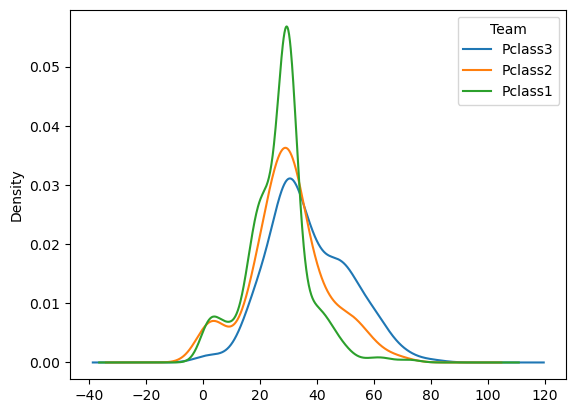

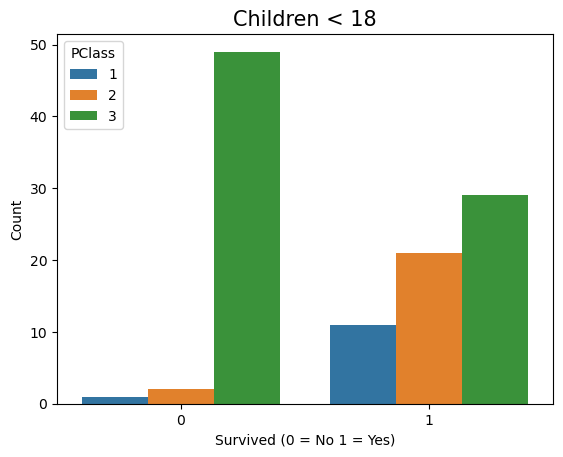

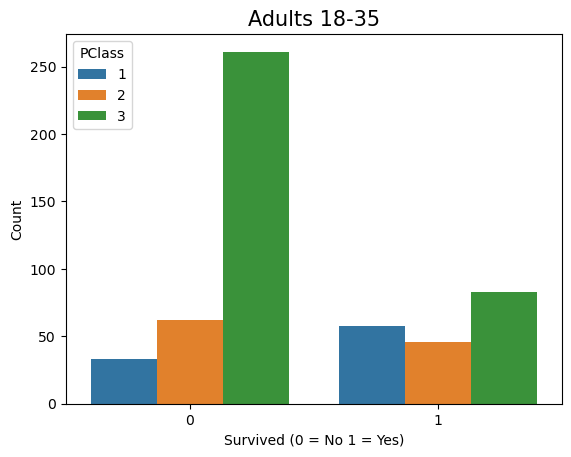

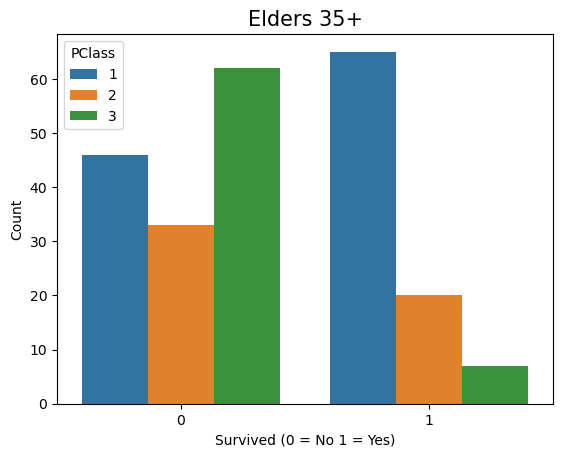

In [13]:
print(train_db['Age'].describe())
child = train_db[train_db['Age'] < 18]
adult = train_db[(train_db['Age'] >= 18) & (train_db['Age'] < 35)]
elder = train_db[train_db['Age'] >= 35]

#print(child.describe())
#print(adult.describe())
#print(elder.describe())
train_db.groupby('Pclass')['Age'].plot(kind='kde')
plt.legend(['Pclass3', 'Pclass2', "Pclass1"], title='Team')

fig, ax = plt.subplots()
plt.title("Children < 18", fontsize = 15)
ax = sns.countplot(x=child['Survived'],hue= child['Pclass'])
ax.set_xlabel("Survived (0 = No 1 = Yes)")
ax.set_ylabel("Count")
plt.legend(title='PClass', loc='upper left', labels=['1', '2', '3'])
plt.show()

plt.title("Adults 18-35", fontsize = 15)
ax = sns.countplot(x=adult['Survived'],hue= adult['Pclass'])
ax.set_xlabel("Survived (0 = No 1 = Yes)")
ax.set_ylabel("Count")
plt.legend(title='PClass', loc='upper left', labels=['1', '2', '3'])
plt.show()

plt.title("Elders 35+", fontsize = 15)
ax = sns.countplot(x=elder['Survived'],hue= elder['Pclass'])
ax.set_xlabel("Survived (0 = No 1 = Yes)")
ax.set_ylabel("Count")
plt.legend(title='PClass', loc='upper left', labels=['1', '2', '3'])
plt.show()

In [14]:
ageSubData = train_db[['Survived','Age']]
ageSubData['Age'] = ageSubData['Age'].map(lambda x: 0 if x < 18 else 2 if x >=35 else 1)
ageSubData = ageSubData.groupby('Age')
# print(ageSubData)
childrenGroup = ageSubData.get_group(0)
adultGroup = ageSubData.get_group(1)
elderGroup = ageSubData.get_group(2)
print("Children:", str(len(childrenGroup[childrenGroup['Survived'] == 1])/len(childrenGroup) * 100) , '%')
print("Adult:", str(len(adultGroup[adultGroup['Survived'] == 1])/len(adultGroup)* 100) , '%')
print("Elder:", str(len(elderGroup[elderGroup['Survived'] == 1])/len(elderGroup)* 100) , '%')

# childrenGroup.head()

Children: 53.98230088495575 %
Adult: 34.43830570902394 %
Elder: 39.48497854077253 %


C:\Users\Jaden\AppData\Local\Temp\ipykernel_25876\225638875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ageSubData['Age'] = ageSubData['Age'].map(lambda x: 0 if x < 18 else 2 if x >=35 else 1)


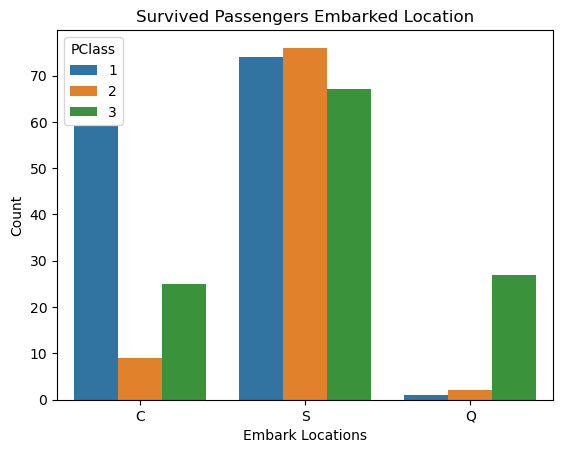

In [15]:
embarkedSurvive = train_db[(train_db["Survived"] == 1)]
order = ["C","S","Q"]
ax = sns.countplot(x=embarkedSurvive['Embarked'],hue= embarkedSurvive['Pclass'], order=order)
ax.set_xlabel("Embark Locations")
ax.set_ylabel("Count")
ax.set_title("Survived Passengers Embarked Location")
plt.legend(title='PClass', loc='upper left', labels=['1', '2', '3'])
plt.show()

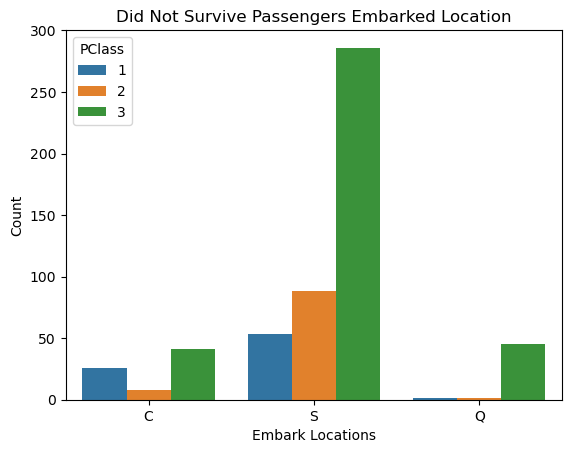

In [16]:
embarkedDead = train_db[(train_db["Survived"] == 0)]
ax = sns.countplot(x=embarkedDead['Embarked'],hue= embarkedDead['Pclass'], order=order)
ax.set_xlabel("Embark Locations")
ax.set_ylabel("Count")
ax.set_title("Did Not Survive Passengers Embarked Location")
plt.legend(title='PClass', loc='upper left', labels=['1', '2', '3'])
plt.show()

In [17]:
SEED = 6575675
#Generating Training set randomly 80% of data
trainingSet = train_db.sample(frac=0.8, random_state=SEED)
verificationSet = train_db.drop(index = trainingSet.index)
trainingSet.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
846,847,0,3,0.0,29.699118,8,2,69.5500,S
41,42,0,2,1.0,27.000000,1,0,21.0000,S
633,634,0,1,0.0,29.699118,0,0,0.0000,S
324,325,0,3,0.0,29.699118,8,2,69.5500,S
882,883,0,3,1.0,22.000000,0,0,10.5167,S


In [18]:
from sklearn import metrics
#MODEL 1 SELECTING ['Age', 'Fare']
features = ['Age', 'Fare']
x = trainingSet[features]
y = trainingSet['Survived']

#Creating Logistic Regression Model
logReg = LogisticRegression()
logReg.fit(x,y)
verTesting = verificationSet[['Age','Fare']]
guessSurvive = logReg.predict(verTesting)

#Confusion matrix 
actualSurvive = verificationSet[['Survived']]
confuseMatrix = metrics.confusion_matrix(actualSurvive,guessSurvive)
print("Confusion Matrix")
print(confuseMatrix)
print("Coefficients:",logReg.coef_)
print("Intercept:",logReg.intercept_)
t = verificationSet[(verificationSet['Survived'] == 1)]
# print(guessSurvive)


Confusion Matrix
[[102  13]
 [ 42  21]]
Coefficients: [[-0.02060535  0.01551172]]
Intercept: [-0.3003101]


In [19]:
accuracy = (confuseMatrix[0][0] + confuseMatrix[1][1])/((confuseMatrix[0][0] + confuseMatrix[0][1] + confuseMatrix[1][0] + confuseMatrix[1][1]))
print("Accuracy", accuracy)
precison = confuseMatrix[1][1]/(confuseMatrix[1][1] + confuseMatrix[0][1])
print("Precision", precison)
recall = confuseMatrix[1][1]/(confuseMatrix[1][1] + confuseMatrix[1][0])
print('Recall',recall)
fScore = 2 * (precison * recall)/(precison+recall)
#calculating f score
print('F1 Score',fScore)

Accuracy 0.6910112359550562
Precision 0.6176470588235294
Recall 0.3333333333333333
F1 Score 0.4329896907216495


In [20]:
##MODEL 2 SELECTING ['Age', 'Fare','Pclass', 'Sex']
features = ['Age', 'Fare', 'Pclass', 'Sex']
x = trainingSet[features]
y = trainingSet['Survived']

#Creating Logistic Regression Model
logReg = LogisticRegression()
logReg.fit(x,y)
verTesting = verificationSet[['Age','Fare','Pclass', 'Sex']]
guessSurvive = logReg.predict(verTesting)

#Confusion matrix TP,FP,FN,TN
actualSurvive = verificationSet[['Survived']]
confuseMatrix = metrics.confusion_matrix(actualSurvive,guessSurvive)
print("Confusion Matrix")
print(confuseMatrix)
print("Coefficients:",logReg.coef_)
print("Intercept:",logReg.intercept_)
# print(guessSurvive)

Confusion Matrix
[[96 19]
 [17 46]]
Coefficients: [[-3.30970231e-02  1.36183381e-03 -1.00252616e+00  2.44342669e+00]]
Intercept: [1.81473253]


In [21]:
accuracy = (confuseMatrix[0][0] + confuseMatrix[1][1])/((confuseMatrix[0][0] + confuseMatrix[0][1] + confuseMatrix[1][0] + confuseMatrix[1][1]))
print("Accuracy", accuracy)
precison = confuseMatrix[1][1]/(confuseMatrix[1][1] + confuseMatrix[0][1])
print("Precision", precison)
recall = confuseMatrix[1][1]/(confuseMatrix[1][1] + confuseMatrix[1][0])
print('Recall',recall)
fScore = 2 * (precison * recall)/(precison+recall)
#calculating f score
print('F1 Score',fScore)

Accuracy 0.797752808988764
Precision 0.7076923076923077
Recall 0.7301587301587301
F1 Score 0.7187500000000001


In [22]:
#MODEL 3 Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
pd.options.mode.chained_assignment = None

features = ['Pclass', 'Sex', 'Age','Embarked']

#Transforming Categoral Data to numbers for Tree Fit
x = trainingSet[features]
lb = preprocessing.LabelEncoder()
x['Sex'] = lb.fit_transform(x['Sex'])
x['Age'] = x['Age'].map(lambda x: 0 if x < 18 else 2 if x >=35 else 1)
x['Embarked'] = lb.fit_transform(x['Embarked'])

print(x.head())
y = trainingSet['Survived']

#Creating Decision Model
decisionModel = DecisionTreeClassifier()
decisionModel.fit(x,y)

verTesting = verificationSet[features]
verTesting['Sex'] = lb.fit_transform(verTesting['Sex'])
verTesting['Age'] = verTesting['Age'].map(lambda x: 0 if x < 18 else 2 if x >=35 else 1)
verTesting['Embarked'] = lb.fit_transform(verTesting['Embarked'])




guessSurvive = decisionModel.predict(verTesting)

actualSurvive = verificationSet[['Survived']]
confuseMatrix = metrics.confusion_matrix(actualSurvive,guessSurvive)
print("Confusion Matrix")
print(confuseMatrix)




     Pclass  Sex  Age  Embarked
846       3    0    1         2
41        2    1    1         2
633       1    0    1         2
324       3    0    1         2
882       3    1    1         2
Confusion Matrix
[[110   5]
 [ 23  40]]


In [23]:
accuracy = (confuseMatrix[0][0] + confuseMatrix[1][1])/((confuseMatrix[0][0] + confuseMatrix[0][1] + confuseMatrix[1][0] + confuseMatrix[1][1]))
print("Accuracy", accuracy)
precison = confuseMatrix[1][1]/(confuseMatrix[1][1] + confuseMatrix[0][1])
print("Precision", precison)
recall = confuseMatrix[1][1]/(confuseMatrix[1][1] + confuseMatrix[1][0])
print('Recall',recall)
fScore = 2 * (precison * recall)/(precison+recall)
#calculating f score
print('F1 Score',fScore)

Accuracy 0.8426966292134831
Precision 0.8888888888888888
Recall 0.6349206349206349
F1 Score 0.7407407407407407


[Text(0.48223039215686275, 0.9375, 'X[1] <= 0.5\ngini = 0.476\nsamples = 711\nvalue = [434, 277]'),
 Text(0.19975490196078433, 0.8125, 'X[0] <= 1.5\ngini = 0.312\nsamples = 461\nvalue = [372, 89]'),
 Text(0.058823529411764705, 0.6875, 'X[2] <= 0.5\ngini = 0.451\nsamples = 99\nvalue = [65, 34]'),
 Text(0.0392156862745098, 0.5625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.0784313725490196, 0.5625, 'X[3] <= 0.5\ngini = 0.442\nsamples = 97\nvalue = [65, 32]'),
 Text(0.0392156862745098, 0.4375, 'X[2] <= 1.5\ngini = 0.463\nsamples = 33\nvalue = [21, 12]'),
 Text(0.0196078431372549, 0.3125, 'gini = 0.444\nsamples = 15\nvalue = [10, 5]'),
 Text(0.058823529411764705, 0.3125, 'gini = 0.475\nsamples = 18\nvalue = [11, 7]'),
 Text(0.11764705882352941, 0.4375, 'X[3] <= 1.5\ngini = 0.43\nsamples = 64\nvalue = [44, 20]'),
 Text(0.09803921568627451, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.13725490196078433, 0.3125, 'X[2] <= 1.5\ngini = 0.433\nsamples = 63\nvalue = [43, 20

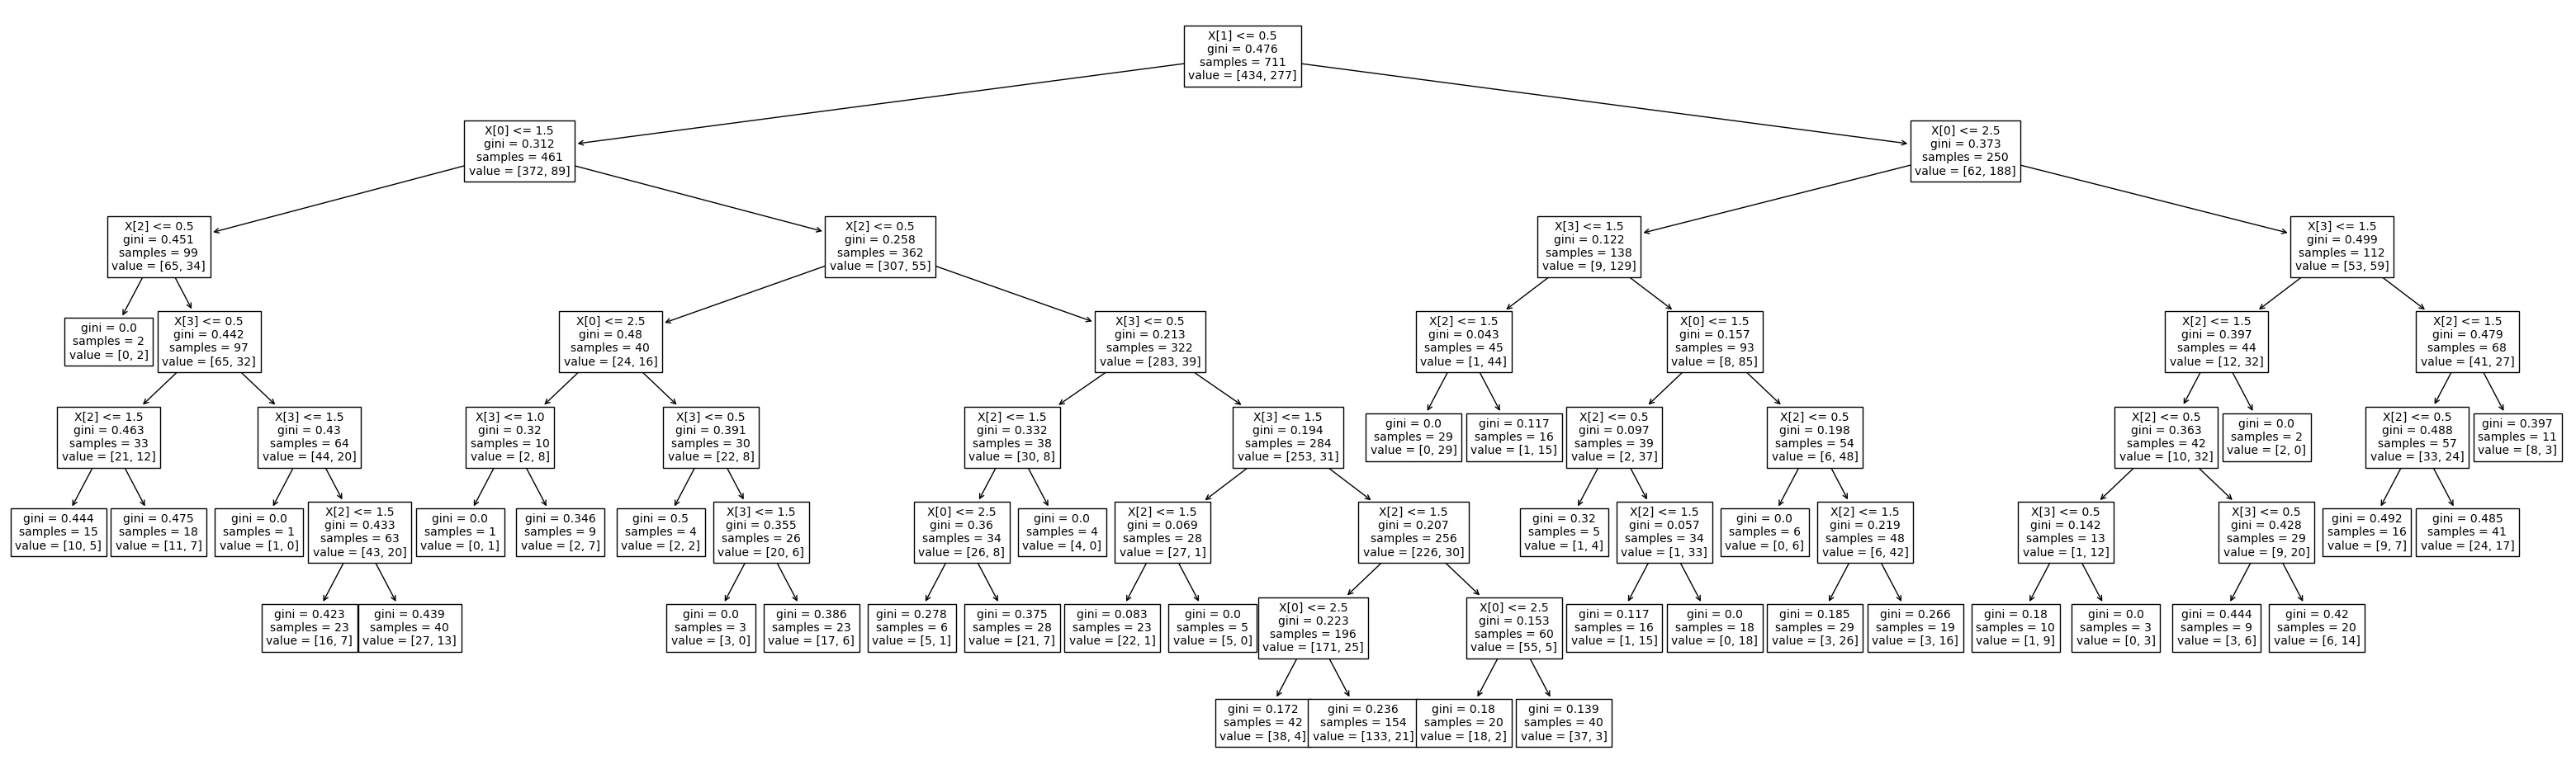

In [24]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40,12))
tree.plot_tree(decisionModel,fontsize=10)

In [25]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1_score': make_scorer(f1_score)}

logReg = LogisticRegression()
features = ['Age', 'Fare']

scores = cross_validate(logReg, train_db[features], train_db[['Survived']].values.ravel(), cv = 10, scoring=scoring)

print("Average Accuracy", scores['test_accuracy'].mean(), "STD:", scores['test_accuracy'].std())
print("Average Precision", scores['test_precision'].mean(), "STD:", scores['test_precision'].std())
print('Average Recall',scores['test_recall'].mean(), "STD:", scores['test_recall'].std())
print('Average F1 score',scores['test_f1_score'].mean(), "STD:", scores['test_f1_score'].std())


Average Accuracy 0.6591547497446373 STD: 0.04332839348130216
Average Precision 0.6439906584643427 STD: 0.13724597270007546
Average Recall 0.2352941176470588 STD: 0.08823529411764705
Average F1 score 0.3403840126775094 STD: 0.10544077403954101


In [26]:
features = ['Age', 'Fare', 'Pclass', 'Sex']
scores = cross_validate(logReg, train_db[features], train_db[['Survived']].values.ravel(), cv = 10, scoring=scoring)

print("Average Accuracy", scores['test_accuracy'].mean(), "STD:", scores['test_accuracy'].std())
print("Average Precision", scores['test_precision'].mean(), "STD:", scores['test_precision'].std())
print('Average Recall',scores['test_recall'].mean(), "STD:", scores['test_recall'].std())
print('Average F1 score',scores['test_f1_score'].mean(), "STD:", scores['test_f1_score'].std())


Average Accuracy 0.7896450459652706 STD: 0.021398964314535
Average Precision 0.7371481650942698 STD: 0.02485488104750012
Average Recall 0.7029411764705883 STD: 0.08964559208310686
Average F1 score 0.7160921594985707 STD: 0.0441195740440703


In [27]:
decisionModel = DecisionTreeClassifier()
features = ['Pclass', 'Sex', 'Age','Embarked']
y = ['Pclass', 'Sex', 'Age','Embarked', 'Survived']
x = train_db[y]
lb = preprocessing.LabelEncoder()
x['Sex'] = lb.fit_transform(x['Sex'])
x['Age'] = x['Age'].map(lambda x: 0 if x < 18 else 2 if x >=35 else 1)
x['Embarked'] = lb.fit_transform(x['Embarked'])


scores = cross_validate(decisionModel, x[features], x[['Survived']].values.ravel(), cv = 10, scoring=scoring)

print("Average Accuracy", scores['test_accuracy'].mean(), "STD:", scores['test_accuracy'].std())
print("Average Precision", scores['test_precision'].mean(), "STD:", scores['test_precision'].std())
print('Average Recall',scores['test_recall'].mean(), "STD:", scores['test_recall'].std())
print('Average F1 score',scores['test_f1_score'].mean(), "STD:", scores['test_f1_score'].std())


Average Accuracy 0.8256511746680285 STD: 0.03523787807385179
Average Precision 0.8902189274026583 STD: 0.05047306451573542
Average Recall 0.6205882352941178 STD: 0.08049371872590592
Average F1 score 0.7290231738587578 STD: 0.06325461721020288
